# Main Dashboard of PhD experiments in pre silicon

In [1]:
%matplotlib inline
results_file = 'presilicon_results.csv'
import os
from pca.analytics import *
from pre_silicon.presi_data_gen import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

# Characterization of worklaods based on instructions kind

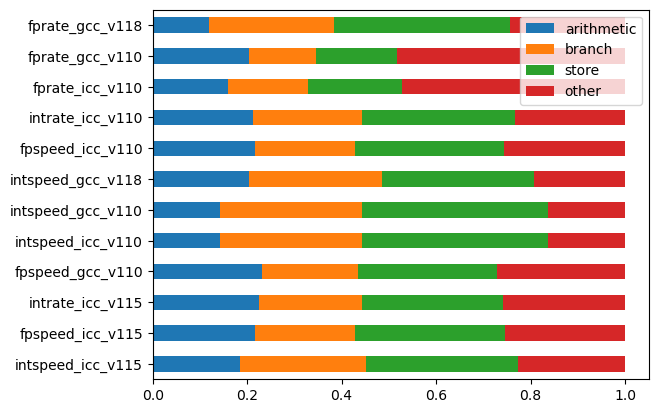

            test_name  arithmetic    branch     store     other
0   intspeed_icc_v115    0.185211  0.265828  0.322163  0.226798
1    fpspeed_icc_v115    0.216477  0.211054  0.319204  0.253265
2    intrate_icc_v115    0.224198  0.218006  0.299543  0.258253
3    fpspeed_gcc_v110    0.231113  0.203147  0.294531  0.271209
4   intspeed_icc_v110    0.142368  0.300834  0.393578  0.163219
5   intspeed_gcc_v110    0.142060  0.300718  0.394037  0.163185
6   intspeed_gcc_v118    0.203160  0.281759  0.321229  0.193852
7    fpspeed_icc_v110    0.217222  0.211020  0.316314  0.255443
8    intrate_icc_v110    0.213217  0.230732  0.321994  0.234057
9     fprate_icc_v110    0.158721  0.169491  0.200187  0.471601
10    fprate_gcc_v110    0.204288  0.141344  0.170889  0.483480
11    fprate_gcc_v118    0.119896  0.264354  0.372388  0.243362


In [6]:
files = dir_list = os.listdir("tests/pre_silicon_runs")
my_labels = ['arithmetic', 'branch', 'store', 'other']
df_global = pd.DataFrame(columns=my_labels)
for file_name in files:
    test_name = file_name
    df = read_histogram(os.path.join("tests/pre_silicon_runs",file_name))
    df_sumary = calcualte_values(df)
    df_global.loc[test_name] = df_sumary['probability'].values.tolist()

plot_stacked_bar(df_global)

df_global.reset_index(inplace=True)
df_global = df_global.rename(columns={"index": "test_name"} )

print(df_global)

df_global.to_csv(results_file)

Covariance matrix 
 [[ 1.09090909 -0.5446673  -0.43306708  0.15034474]
 [-0.5446673   1.09090909  0.99326536 -0.97715607]
 [-0.43306708  0.99326536  1.09090909 -1.03353088]
 [ 0.15034474 -0.97715607 -1.03353088  1.09090909]]
Eigenvectors 
 [[ 0.28676196 -0.91173166 -0.27094275 -0.11446828]
 [-0.56263699  0.02416679 -0.36322579 -0.74224161]
 [-0.56204458 -0.11539743 -0.48528232  0.65976541]
 [ 0.53414707  0.39350322 -0.74776876 -0.0261536 ]]
Eigenvalues 
 [3.28840826e+00 9.85644449e-01 3.21833367e-16 8.95836582e-02]


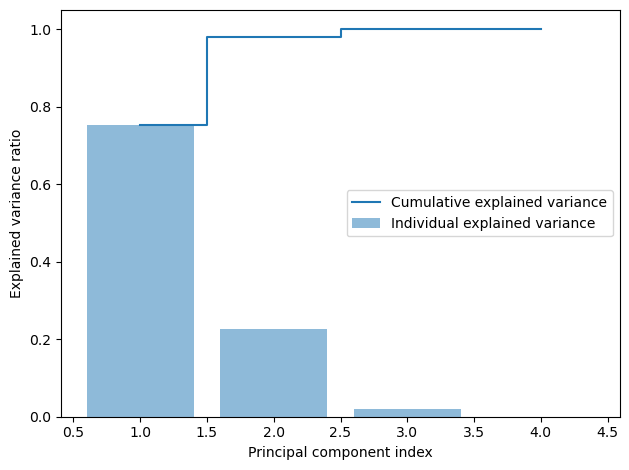

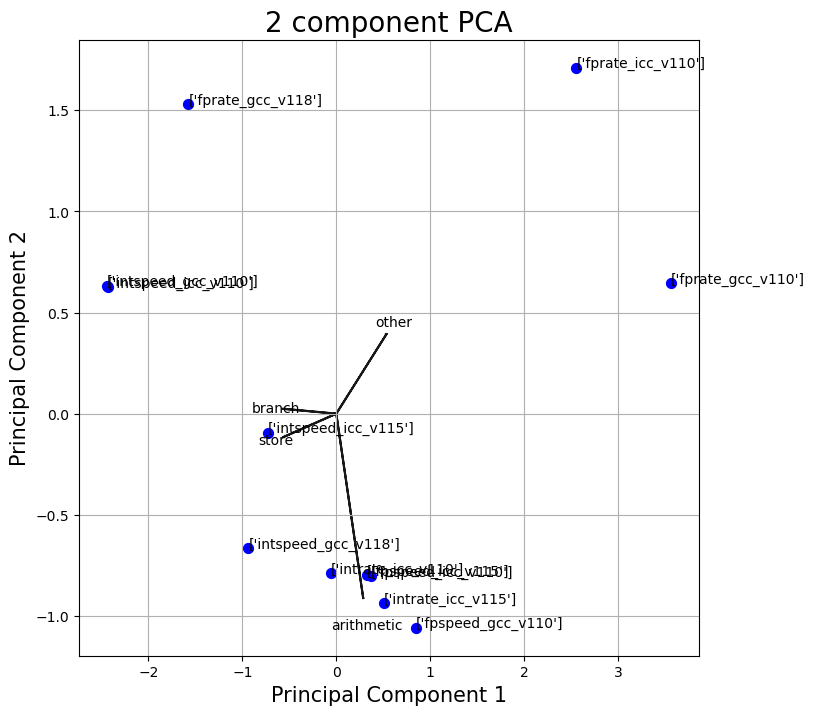

In [7]:
df = df_global

df_ = df.loc[:, df.columns != 'test_name']
df_ = (df_-df_.min())/(df_.max()-df_.min())
extracted_col = df["test_name"]
df_.insert(0, 'test_name', extracted_col)
df_.set_index('test_name')
df_.to_csv('normalized_df.csv')
df = df_

features = list(df.columns)[1:]
test_column = list(df.columns)[0]
    
pca_df = get_PCA(df, features, test_column)

# Plot characteristics of the worklaods

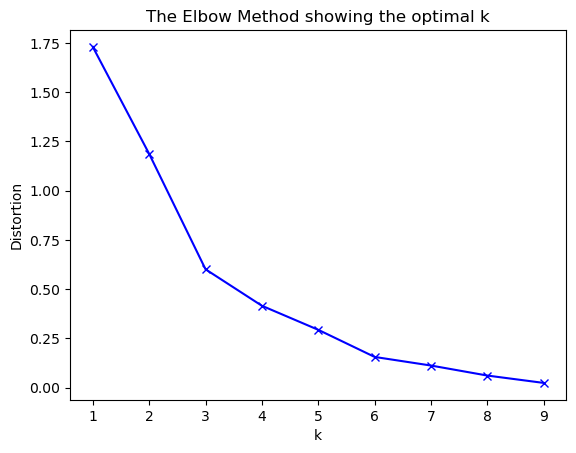

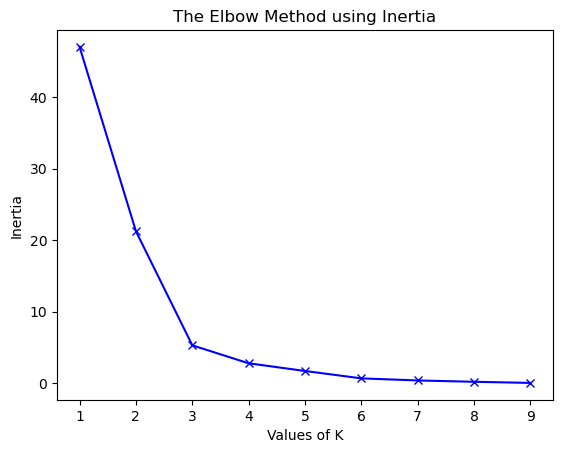

3


In [9]:
if os.path.exists("pca.csv"):    
    clusters = calculate_elbow(pd.read_csv("pca.csv"))

In [10]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 3


## Clasification based on optimal number of clusters

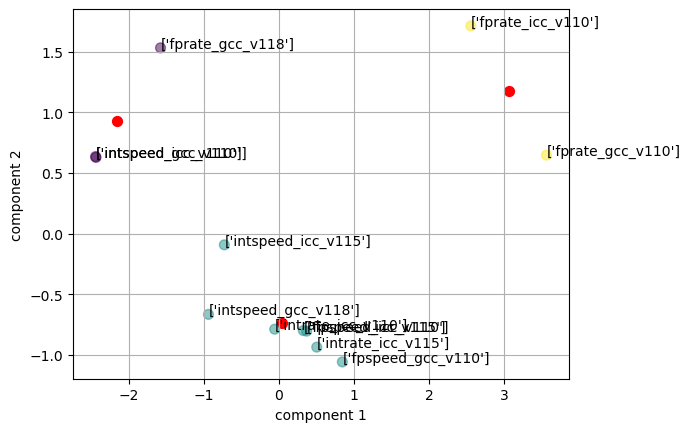

   PRED          test_name
0     0  intspeed_icc_v110
0     0  intspeed_gcc_v110
0     0    fprate_gcc_v118
1     1  intspeed_icc_v115
1     1   fpspeed_icc_v115
1     1   intrate_icc_v115
1     1   fpspeed_gcc_v110
1     1  intspeed_gcc_v118
1     1   fpspeed_icc_v110
1     1   intrate_icc_v110
2     2    fprate_icc_v110
2     2    fprate_gcc_v110


In [13]:
df_result,kmeans = kmean_cluster("pca.csv",clusters)
print(df_result)

# Get the test cases closer to centroid

In [14]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
pca_df.iloc[closest]

,Unnamed: 0,principal component 1,principal component 2,test_name
5,5,-2.438362,0.633958,intspeed_gcc_v110
8,8,-0.054962,-0.788604,intrate_icc_v110
10,10,3.561479,0.646052,fprate_gcc_v110
